## **I.  INTRODUCTION**

- **Name:** Daniel Christopher Miarsa

- **Dashboard Link :** [Tableau Dashboard](https://public.tableau.com/views/Milestone1_17623572447880/Demographic?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

## **II. PROBLEM STATEMENT**

### 2.1) TOPIC

- Topic: Lifestyle Assessment towards Diabetes Risk

- Dataset: [CDC Diabetes Health Indicators](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

***Dataset Descritption:***

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.

---

### 2.2) BACKGROUND

The number of people having diabetes keep rising over the year. According to CDC(2024), the diabtes prevalence rate has risen from 10.3% to 13.2% between 2001 and 2020. In 2021 alone, there are 1.7 million adults aged ≥ 20 years old in the US who had diabetes, which accounted for 5.7% of total diabetes adults population. Moreover, the incidence rate of Type 2 Diabetes in younger group (10-19 years old) has surged more than double from 2003 to 2018. Therefore, further analysis towards lifestyle or behaviour in the society need to be assessed in multiple age group.

---

Notes:
- Prevalence --> the number of new & existing case / total population
- Incidence --> the number of new case / total population

---

### 2.3) PROBLEM STATEMENT

***SMART Analysis:***
- ***Specific***    : Assessing certain lifestyle / behaviour factors of a population which significantly increase the probability of getting diabetes

- ***Measurable***  : Reducing diabetes prevalence rate by 5% YoY and lowering incidence rate by 15% YoY

- ***Attainable***  : Spreading awareness to avoid certain lifestyles, promoting consistent physical exercise routines, incentivizing annual medical check-up by governments, restricting high-sugar food & beverage manufacturers & consumers through sugar tax policy, labelling consumers product based on the sugar level

- ***Relevance***   : Lowering the risk of diabetes will improve the life expectancy, increase quality of life, and reduce mortality rate due to diabetes comorbid.

- ***Time-bound***  : 4-5 Years

***Problem Statement:***

Reducing diabetes prevalence rate by 5% & incidence rate by 15% within 5 years based on lifestyle adjustments. To achieve this goal, multiple approaches are used, for instance, spreading awareness regarding poor lifestyles / behaviours that lead to diabetes, promoting consistent physical exercise routines, incentivizing annual medical check-up by governments, restricting high-sugar food & beverage manufacturers & consumers through sugar tax policy, and labelling consumers product based on the sugar level.

***Problem Questions (5W+1H):***
+ What factors which significantly increase the risk of diabetes?
+ What is the diabetes prevalence rate in general and by age?
+ Does demographic background effect the diabetes rate?
+ Does older population tend to have diabetes than younger generation?
+ How significant is maintaing healthy lifestyles in reducing diabetes risk?

## **III. DATA LOADING**

In [1]:
# Install UC Irvine repostiory
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Set up libraries & packages
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
# Combine X & y into 1 df
df = X.join(y)
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [4]:
# General summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [5]:
# Check missing values
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [6]:
# Assessing how many unique values each column has
df.nunique()

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes_binary          2
dtype: int64

Summary:
- There are 253,680 rows and 22 columns in this dataframe

- No missing values found in the data
- Most of the columns have binary values (0 and 1), but there are some categorical columns that contains > 2 unique values (BMI, MenthHlth, PyhsHlth, Age, Education, and Income)

## **IV. DATA CLEANING**

### 4.1) REMOVING COLUMNS

- According to the dataset source, `PyhsHlth & MentHlth` assess total days the patient had been experiencing physical illness or mental health issues within the last 31 days. Hence, these parameters don't necessarily answering the main diabetes issues and can be removed from this analysis.


- `DiffWalk` columns which describe the patient's inability or difficulty in walking or climbing stairs doesn't directly means the patients is suffering from diabetes. The parameter is too general, thus removing this column will not effect the analysis.

In [7]:
# Removing MenthHlth, PhysHlth, and DiffWalk columns
df = df.drop(columns=['PhysHlth','MentHlth','DiffWalk'])

### 4.2) REDUCING REDUNDANT CATEGORY SCALES

Education consists of 6 scales (EDUCA codebook):
- 1 = Never attended school or only kindergarten 
- 2 = Grades 1 through 8 (Elementary) 
- 3 = Grades 9 through 11 (Some high school) 
- 4 = Grade 12 or GED (High school graduate) 
- 5 = College 1 year to 3 years (Some college or technical school) 
- 6 = College 4 years or more (College graduate)

In [8]:
# Check the frequency in each Education scale
df.Education.value_counts()

Education
6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: count, dtype: int64

Since group 1-3 are in the bottom 3 of the list, narrowing the scales into 4 groups is possible and won't effect any bias.

The new scale list will be:
- 1 = Didn't finish High school or Below High school
- 2 = Grade 12 or GED (High school graduate) 
- 3 = College 1 year to 3 years (Some college or technical school) 
- 4 = College 4 years or more (College graduate)

In [9]:
# Assign new values in Education column

# Change all scale 1,2,3 --> 1
index_ed = df.loc[df['Education'].isin([1,2,3])].index
df.loc[index_ed,'Education'] = 1

# Change scale 4 --> 2
df.loc[df['Education']==4, 'Education'] = 2

# Change scale 5 --> 3
df.loc[df['Education']==5, 'Education'] = 3

# Change scale 6 --> 4
df.loc[df['Education']==6, 'Education'] = 4

In [10]:
# Check new Education values
df.Education.value_counts()

Education
4    107325
3     69910
2     62750
1     13695
Name: count, dtype: int64

### 4.3) DESCRIPTIVE TEST

In [11]:
# Analyze the data distribution among columns with unique values > 2 (Non-Binary Columns)
round(df[['BMI','GenHlth','Education','Income','Age']].describe(),2)

,BMI,GenHlth,Education,Income,Age
count,253680.00,253680.00,253680.00,253680.00,253680.00
mean,28.38,2.51,3.07,6.05,8.03
std,6.61,1.07,0.94,2.07,3.05
min,12.00,1.00,1.00,1.00,1.00
25%,24.00,2.00,2.00,5.00,6.00
50%,27.00,2.00,3.00,7.00,8.00
75%,31.00,3.00,4.00,8.00,10.00
max,98.00,5.00,4.00,8.00,13.00


In [12]:
# Comparing Mean vs Median
cols = ['BMI','GenHlth','Education','Income','Age']

for i in cols:
    print(i)
    print('Mean=',df[i].mean())
    print('Median=',df[i].median(),'\n')

BMI
Mean= 28.382363607694735
Median= 27.0 

GenHlth
Mean= 2.5113923052664773
Median= 2.0 

Education
Mean= 3.067742825607064
Median= 3.0 

Income
Mean= 6.053874960580258
Median= 7.0 

Age
Mean= 8.032119205298013
Median= 8.0 



- BMI --> Slightly not normal (Mean > Median)

- GenHlth --> Slightly not normal (Mean > Median)
- Education --> Normal (Mean ± Median)
- Income --> Slightly not normal (Mean < Median)
- Age --> Normal (Mean ± Median)

In [13]:
# Skewness & Kurtosis
for i in cols:
    print(i)
    print('Skewness =',df[i].skew())
    print('Kurtosis =',df[i].kurtosis(),'\n')

BMI
Skewness = 2.1220037582911084
Kurtosis = 10.99747329433511 

GenHlth
Skewness = 0.42286687511201615
Kurtosis = -0.38326139897547806 

Education
Skewness = -0.5261757284038143
Kurtosis = -0.9062764489296762 

Income
Skewness = -0.8913449906673199
Kurtosis = -0.280329261813542 

Age
Skewness = -0.35990324786631683
Kurtosis = -0.581222727529414 



- BMI --> Extremely skewed (Skewness > 1) & Leptokurtic (Kurtosis > 0)

- GenHlth --> Normal (-0.5 < Skewness < 0.5) & Platykurtic (Kurtosis < 0)
- Education --> Moderately skewed (-1 < skewness < -0.5) & Platykurtic (Kurtosis < 0)
- Income --> Moderately skewed (-1 < skewness < -0.5) & Platykurtic (Kurtosis < 0)
- Age --> Normal (-0.5 < Skewness < 0.5) & Platykurtic (Kurtosis < 0)

In [14]:
# Normality Test
for i in cols:
    print(i)
    print('K2 Test =', stats.normaltest(df[i]).pvalue)
    print('Shapiro =', stats.shapiro(df[i]).pvalue,'\n')

BMI


K2 Test = 0.0
Shapiro = 2.8075041639018313e-139 

GenHlth
K2 Test = 0.0
Shapiro = 5.998221335257306e-132 

Education
K2 Test = 0.0
Shapiro = 3.3579814013733176e-150 

Income
K2 Test = 0.0


/opt/miniconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253680.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro = 7.104015319145788e-145 

Age
K2 Test = 0.0
Shapiro = 2.5444298490918793e-102 



Normality Hypothesis
- $H_0$: The distribution is normal

- $H_1$: The distribution is not normal

All variables fail to reject the null hypothesis (p-value < 0.05), indicating the distribution is not normal

Summary:

According to the descriptive analysis & normality test, here's the conclusion of each column:
- BMI = Not Normal --> Continuous

- GenHlth = Normal --> Discrete (Encoded ORDINAL)
- Education = Normal --> Discrete (Encoded ORDINAL)
- Income = Not Normal --> Discrete (Encoded ORDINAL)
- Age = Normal --> Discrete (Encoded ORDINAL)

### 4.4) OUTLIER HANDLING

<Axes: >

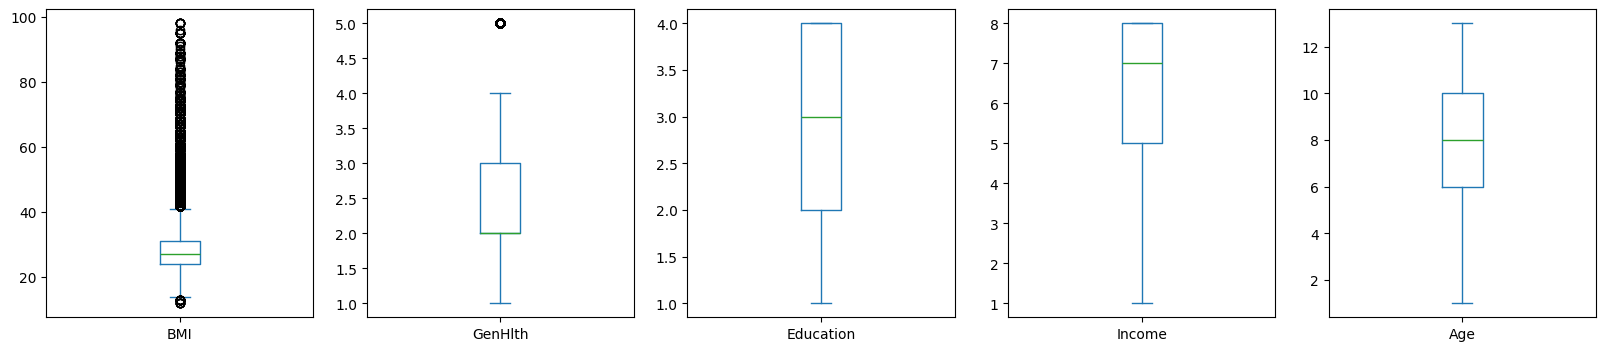

In [15]:
# Showing distribtuion & outlier in Boxplot

fig, ax = plt.subplots(ncols=5,figsize=(20,4))
df['BMI'].plot(kind='box',ax=ax[0])
df['GenHlth'].plot(kind='box',ax=ax[1])
df['Education'].plot(kind='box',ax=ax[2])
df['Income'].plot(kind='box',ax=ax[3])
df['Age'].plot(kind='box',ax=ax[4])

According to the Boxplot charts, only 2 columns contain outliers (BMI & GenHlth). However, outlier removal is only applicable to numerical columns. In this case, `GenHlth` is an encoded categorical column. Hence, removing 1 or more category class will caused the data bias & invalid.

Tukey's Rule will be applied to remove `BMI` outliers because the column is not symmetrical & the skew value > 0.5.

In [16]:
# Outlier Removal using Tukey's Rule
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)

iqr =q3-q1
    
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}\n')

Upper Boundary: 41.50
Lower Boundary: 13.50



In [17]:
# Seperate outlier & clean data
outlier = df.loc[(df['BMI']<13.50) | (df['BMI']>41.50)]
clean = df.loc[(df['BMI']>=13.50) & (df['BMI']<=41.50)]

# Calculate % of outlier
print(f'Percentage of outliers: {len(outlier)*100/len(df):.2f}%')

Percentage of outliers: 3.88%


## **V. ANALYSIS**

***Problem Questions (5W+1H):***
+ What factors which significantly increase the risk of diabetes?
+ What is the diabetes prevalence rate in general and by age?
+ Does demographic background effect the diabetes rate?
+ Does older population tend to have diabetes than younger generation?
+ How significant is maintaing healthy lifestyles in reducing diabetes risk?

#### ***1. What factors which significantly increase the risk of diabetes?***

Chi-square test is used to analyze the correlation of each variable towards `Diabetes_binary`
- $H_0$: A variable and `Diabetes_binary` are independent

- $H_1$: A variable and `Diabetes_binary` are dependent

In [18]:
# Chi-square test
cols = clean.drop(columns='Diabetes_binary').columns

corr_pvalues =[]
for col in cols:
  cross = pd.crosstab(clean[col], clean['Diabetes_binary'])
  pval = stats.chi2_contingency(cross).pvalue
  corr_pvalues.append((col,pval))
  prompt = "and they are dependent" if pval<0.05 else ""
  print(f"P-value of {col} and Diabetes: {pval} {prompt}")

P-value of HighBP and Diabetes: 0.0 and they are dependent
P-value of HighChol and Diabetes: 0.0 and they are dependent
P-value of CholCheck and Diabetes: 1.3992776190298208e-213 and they are dependent
P-value of BMI and Diabetes: 0.0 and they are dependent
P-value of Smoker and Diabetes: 1.8374786136231914e-202 and they are dependent
P-value of Stroke and Diabetes: 0.0 and they are dependent
P-value of HeartDiseaseorAttack and Diabetes: 0.0 and they are dependent
P-value of PhysActivity and Diabetes: 0.0 and they are dependent
P-value of Fruits and Diabetes: 8.17538884852981e-79 and they are dependent
P-value of Veggies and Diabetes: 6.829529346486613e-165 and they are dependent
P-value of HvyAlcoholConsump and Diabetes: 1.6768958635344412e-162 and they are dependent
P-value of AnyHealthcare and Diabetes: 2.3222523113228602e-17 and they are dependent
P-value of NoDocbcCost and Diabetes: 2.8636631306259373e-42 and they are dependent
P-value of GenHlth and Diabetes: 0.0 and they are dep

All the p-values above are < 0.05, meaning the $H_0$ or null hypothesis is rejected, making all the variables dependent or correlate significantly to the Diabetes tendency. However, we still need to know which variables have more impact towards the Diabetes result since the p-values result varies.

`GenHlth, Education, Age, Income, & BMI` are Ordinal data, thus it is more appropriate to conduct a Spearman correlation test

In [19]:
# Convert into dictionary
corr_pvalues = dict(corr_pvalues)

In [20]:
# Defining a Spearman Correlation test function
def f_corr(col):
    tmp = clean.groupby(col)[['Diabetes_binary']].mean().reset_index()
    rho_val, pval = stats.spearmanr(tmp[col],tmp['Diabetes_binary'])

    return rho_val, pval

In [21]:
# GenHlth, Education, Age, Income, BMI --> spearmanr
for col in ['BMI','GenHlth','Education','Age','Income']:
    print(col)
    print(f_corr(col),'\n')

    # Modify pvalue in the corr_pvalues list
    corr_pvalues[col] = f_corr(col)[1]

BMI
(np.float64(0.9020251778872468), np.float64(5.5702124959404e-11)) 

GenHlth
(np.float64(0.9999999999999999), np.float64(1.4042654220543672e-24)) 

Education
(np.float64(-1.0), np.float64(0.0)) 

Age
(np.float64(0.9615384615384615), np.float64(1.631768081069998e-07)) 

Income
(np.float64(-0.9761904761904763), np.float64(3.3143960262001043e-05)) 



According to the `rho_val`, Education is and Income has a negative correlation with Diabetes diagnosis, meaning higher education / income level will reduce the risk of diabetes exposure. On the other hand, GenHlth, Age, and BMI correlate postively with diabetes diagnosis.

In [22]:
# Sort all p-values from the highest to lowest
pval_df = pd.DataFrame(corr_pvalues, index=['p-value']).transpose().sort_values(by='p-value',ascending=False)
pval_df

,p-value
Income,3.314396e-05
Age,1.631768e-07
BMI,5.570212e-11
AnyHealthcare,2.322252e-17
GenHlth,1.404265e-24
NoDocbcCost,2.863663e-42
Fruits,8.175389e-79
Sex,1.075566e-82
HvyAlcoholConsump,1.676896e-162
Veggies,6.829529e-165


***Answer:***

Based on the table above, from `HighChol` column and below **(**`HeartDiseaseorAttack`,`HighBP`,`PhysActivity`,`Stroke`,&`Education`**)**, all the `p-values = 0`, indicating these columns have more influence to the Diabetes diagnosis than other variables.



#### ***2. What is the diabetes prevalence rate in general and by age?***

According to [National Institute of Health]('https://www.nimh.nih.gov/health/statistics/what-is-prevalence'), the calculation of prevalence is:

`Prevalence rate (%) = # Number of case * 100 / Total # of people in sample`

In [23]:
# Calculate general prevalence rate
prevalence = len(clean[clean['Diabetes_binary']==1]['Diabetes_binary'])*100 / len(clean)

print(f'General Prevalence Rate = {round(prevalence,2)}%')

General Prevalence Rate = 13.12%


The prevalence rate of the US population is `13.12%`, which means there will be **13,120** people who are diagnosed with diabetes in **every 100,000 people** in a population.

In [24]:
# Filtering a df where all the respondents is diabetes
is_diabetes = clean[clean['Diabetes_binary']==1]

# Defining prevalence rate function
def prev(x):
    '''
    This function calculates the prevalence rate of each age group in the is_diabetes df
    '''
    prev_rate = len(x)*100/len(is_diabetes)
    return round(prev_rate,2)

# Group by Age & apply the function
age_diabetes = is_diabetes.groupby(by='Age')['Diabetes_binary'].agg(prev)
age_diabetes

Age
1      0.22
2      0.33
3      0.78
4      1.63
5      2.66
6      4.57
7      8.26
8     11.56
9     16.02
10    18.71
11    15.19
12    10.21
13     9.87
Name: Diabetes_binary, dtype: float64

Text(0, 0.5, 'Prevalence Rate (%)')

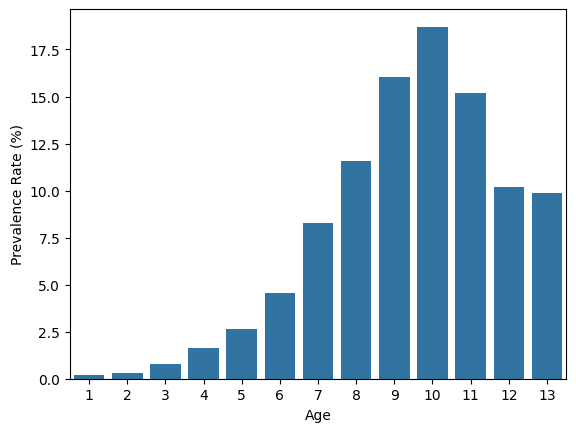

In [25]:
# Plotting into a bar chart
sns.barplot(age_diabetes).set_ylabel('Prevalence Rate (%)')

Among the total diagnosed diabetes respondent, majority of those who suffered diabetes **come from older age group**, which ranging from `55 - 79 years old` according to [AGE5YR Codebook](https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/AGEG5YR?archive=NAHDAP) age scale. In other words, older generation is the most vulnerable age group to suffer from diabetes with the prevalence rate of `10.21% - 18.71%`.

In this data, younger age group (between 18 and 34 y.o OR Group 1-3) contributes the lowest proportion among diabetes patients, ranging from 0.22% to 0.78%. Since this dataset doesn't provide any timeseries information, the current analysis can't evaluate the trend of diabetes prevalence by age group from yearly perspective.

***Summary:***

- The general prevalence rate of the US population is `13.12%`
- Older age group (55-79 years old) contributes the most diabetes patitients the the prevalence ranging from 10.21% - 18.71%

#### ***3. Does demographic background effect the diabetes rate?***

In [26]:
# Demographic columns = Sex, Education, Income, Age
demo_df = pval_df.loc[['Sex','Education','Income','Age']].sort_values(by='p-value',ascending=False)
demo_df

,p-value
Income,3.314396e-05
Age,1.631768e-07
Sex,1.075566e-82
Education,0.000000e+00


All demographic variables influence the probability of diabetes rate.

Which Gender is more susceptible to have diabetes?

In [27]:
# Comparing mean of diabetes probability by gender
female = clean[clean['Sex']==0][['Sex','Diabetes_binary']].groupby("Sex").mean()
male = clean[clean['Sex']==1][['Sex','Diabetes_binary']].groupby("Sex").mean()

print('Female probability=',female['Diabetes_binary'].values)
print('Male probability=',male['Diabetes_binary'].values)

# Showing proportion Diabetes by Sex distribution
pd.crosstab(clean['Sex'], clean['Diabetes_binary'])

Female probability= [0.11935534]
Male probability= [0.1458629]


Diabetes_binary,0,1
Sex,,
0,119175,16152
1,92679,15827


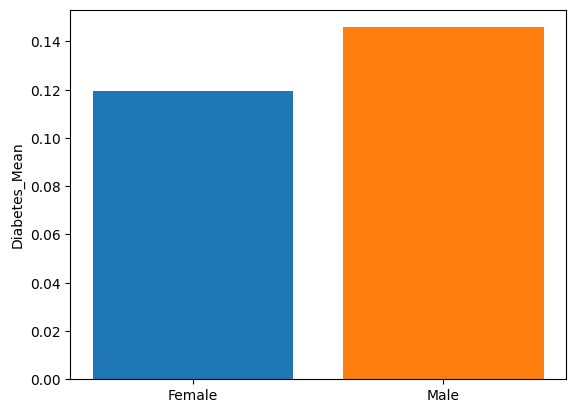

In [28]:
# Creating barplot using Pyplot
fig, ax = plt.subplots()

x1=['Female','Male']
y1=[0.11935534,0]

x2=['Female','Male']
y2=[0,0.1458629]

ax.bar(x1,y1)
ax.bar(x2,y2)

ax.set_ylabel('Diabetes_Mean')

plt.show()

In [29]:
stats.ttest_ind(clean.loc[clean['Sex']==0,'Diabetes_binary'],clean.loc[clean['Sex']==1,'Diabetes_binary'])

TtestResult(statistic=np.float64(-19.284728560245224), pvalue=np.float64(8.321441072182619e-83), df=np.float64(243831.0))

What Education category is more prevalent to diabetes?

<Axes: xlabel='Education'>

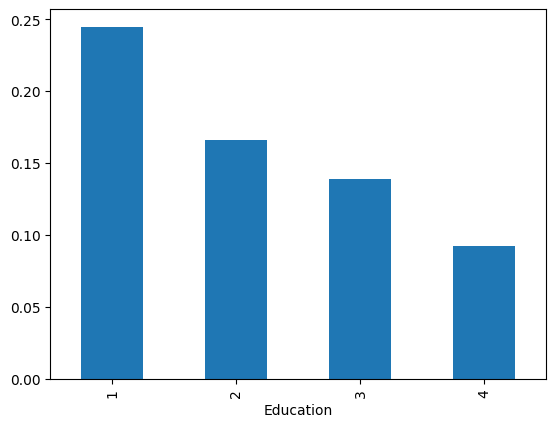

In [30]:
# Creating bar plot
clean.groupby("Education")['Diabetes_binary'].mean().plot(kind='bar')


Based on this graph, people who didn't finish high school (Group 1) are more than 2x riskier to have diabetes than those who possessed higher education level due to lack of information and education to maintain health.

In [31]:
stats.f_oneway(clean.loc[clean['Education']==1,'Diabetes_binary'],
               clean.loc[clean['Education']==2,'Diabetes_binary'],
               clean.loc[clean['Education']==3,'Diabetes_binary'],
               clean.loc[clean['Education']==4,'Diabetes_binary'])

F_onewayResult(statistic=np.float64(1196.7022505728555), pvalue=np.float64(0.0))

What Income category is more prevalent to diabetes?

<Axes: xlabel='Income'>

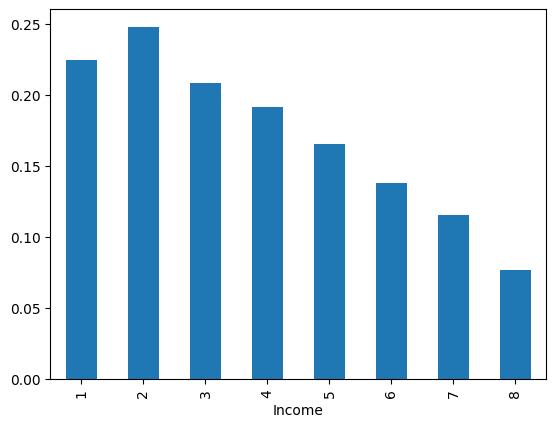

In [32]:
# Creating bar plot
clean.groupby("Income")['Diabetes_binary'].mean().plot(kind='bar')

The income graph also shows a similar pattern where higher income level reduces the chance of suffering diabetes. Interestingly, the income group between 1 and 4 ($10,000 - $24,999 per year) is more than twice riskier than those are in group 8 (≥ $75,000/year). This phenomenon can be happened beacuse higher income individuals tend to have easier & faster access to a better healthcare treatment than those who are in lower income groups.

In [33]:
stats.f_oneway(clean.loc[clean['Income']==1,'Diabetes_binary'],
               clean.loc[clean['Income']==2,'Diabetes_binary'],
               clean.loc[clean['Income']==3,'Diabetes_binary'],
               clean.loc[clean['Income']==4,'Diabetes_binary'],
               clean.loc[clean['Income']==5,'Diabetes_binary'],
               clean.loc[clean['Income']==6,'Diabetes_binary'],
               clean.loc[clean['Income']==7,'Diabetes_binary'],
               clean.loc[clean['Income']==8,'Diabetes_binary'])

F_onewayResult(statistic=np.float64(888.7342706295321), pvalue=np.float64(0.0))

<Axes: xlabel='Age'>

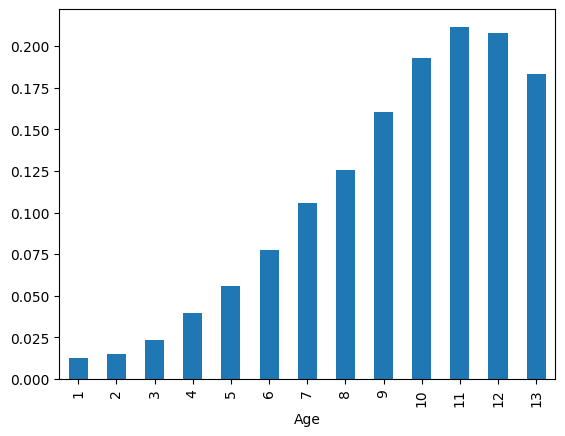

In [34]:
# Creating bar plot
clean.groupby("Age")['Diabetes_binary'].mean().plot(kind='bar')

Based on the graph, people who are in 35-39 years old have increase > 3x the risk of having diabetes than younger group (18-24 years old). In other words, those who have turned to 30 years old need to pay extra attention to maintain their health periodically and to prevent of having diabetes.

***Summary:***

- Male is 17% more prevalent to have diabetes than female
- Higher education & income level can reduce the risk of having diabetes by > 50%
- Starting from 35 years old and beyond, the diabetes risk is > 3x (and counting) than those who are in the early and mid 20s.

---

**Confidence Interval Demographic based on the lab test** 


In [ ]:
# Define a function for Confidence Interval based on BMI
def conf_int (col_name):
    temp_df = clean.loc[clean[col_name]==1]

    q3 = temp_df['BMI'].quantile(0.75)
    q1 = temp_df['BMI'].quantile(0.25)
    iqr = q3-q1

    N = len(temp_df)
    upper_bound = temp_df['BMI'].median() + 1.7 * (1.25*iqr / (1.35*math.sqrt(N))) # --> not normally distirbuted calculation
    lower_bound = temp_df['BMI'].median() - 1.7 * (1.25*iqr / (1.35*math.sqrt(N)))
    return f'Upper Bound: {upper_bound:.2f} \nLower Bound: {lower_bound:.2f}'

In [80]:
# lab_test variables
lab_test=['HighChol',
    'HighBP',
    'HeartDiseaseorAttack',
    'Stroke']

for i in lab_test:
    print(i)
    print(f'{conf_int(i)}', '\n')

HighChol
Upper Bound: 28.03 
Lower Bound: 27.97 

HighBP
Upper Bound: 28.03 
Lower Bound: 27.97 

HeartDiseaseorAttack
Upper Bound: 28.07 
Lower Bound: 27.93 

Stroke
Upper Bound: 27.11 
Lower Bound: 26.89 



Based on the calculation, 95% of the population with high cholesterol, high blood pressure, heart disease, and stroke have a BMI level ranging between 26.89 and 28.07 (overweight class). 

#### ***4. How significant is maintaing healthy lifestyles in reducing diabetes risk?***

In [35]:
# Sort based on Chi-square correlation p-values
pval_df.loc[['PhysActivity','Smoker','Fruits','Veggies','HvyAlcoholConsump']].sort_values(by='p-value',ascending=False)

,p-value
Fruits,8.175389e-79
HvyAlcoholConsump,1.676896e-162
Veggies,6.829529e-165
Smoker,1.837479e-202
PhysActivity,0.000000e+00


Among the lifestyle variables, `Physical Activity` shows the most significant influence in diabetes diagnosis, while eating `Fruits` becomes the least influential.

<Axes: xlabel='Fruits', ylabel='Diabetes_binary'>

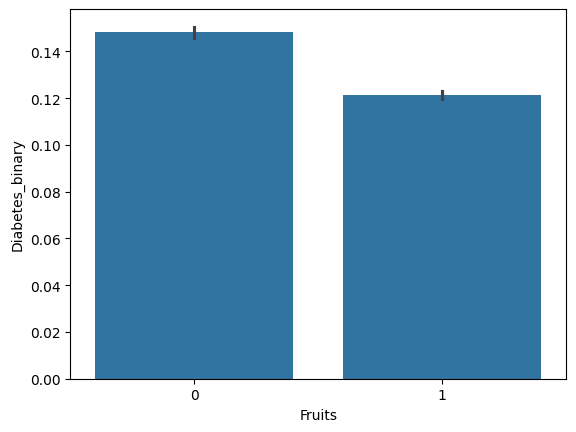

In [36]:
# Fruits BarPlot
Fruits = clean.loc[:,['Fruits','Diabetes_binary']]
sns.barplot(data=Fruits, x='Fruits', y='Diabetes_binary', orient='v')

In [37]:
# T-Test
stats.ttest_ind(clean.loc[clean['Fruits']==0,'Diabetes_binary'],clean.loc[clean['Fruits']==1,'Diabetes_binary'])

TtestResult(statistic=np.float64(18.815598726360086), pvalue=np.float64(6.4023698037355e-79), df=np.float64(243831.0))

In [38]:
# Mean
print('Fruits = 0 -->',clean[clean['Fruits']==0]['Diabetes_binary'].mean())
print('Fruits = 1 -->',clean[clean['Fruits']==1]['Diabetes_binary'].mean())

Fruits = 0 --> 0.148211069960246
Fruits = 1 --> 0.12146714671467147


- 1 = Consume ≥ 1 fruit(s) per day
- 0 = No fruit consumption at all

According to the graph, respondents who don't consume fruit on the daily basis, tend to have 22% higher diabetes chance than those who consume daily.

---

<Axes: xlabel='HvyAlcoholConsump', ylabel='Diabetes_binary'>

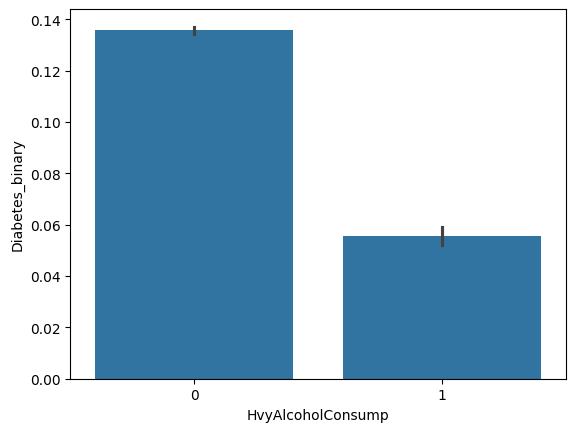

In [39]:
# HvAlcoholConsump BarPlot
Alcohol = clean.loc[:,['HvyAlcoholConsump','Diabetes_binary']]
sns.barplot(data=Alcohol, x='HvyAlcoholConsump', y='Diabetes_binary', orient='v')

In [40]:
# T-test
stats.ttest_ind(clean.loc[clean['HvyAlcoholConsump']==0,'Diabetes_binary'],clean.loc[clean['HvyAlcoholConsump']==1,'Diabetes_binary'])

TtestResult(statistic=np.float64(27.21921350365166), pvalue=np.float64(6.757791758702312e-163), df=np.float64(243831.0))

In [41]:
clean.groupby("HvyAlcoholConsump")['Diabetes_binary'].mean()

HvyAlcoholConsump
0    0.135729
1    0.055747
Name: Diabetes_binary, dtype: float64

In [42]:
# Frequency check
clean[['HvyAlcoholConsump','Diabetes_binary']]['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0    229877
1     13956
Name: count, dtype: int64

In [43]:
# Non-heavy drinker proportion
229877/(229877+13956)

0.9427641049406766

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 
- 0 = no 
- 1 = yes

According to the graph, surprisingly respondents who don't drink heavily are prone to have diabetes compared to the heavy drinkers. This might happen due to imbalance sample proportion of `HvyAlcoholConsump` where nearly 95% of the respondent don't drink alcohol heavily.

---

<Axes: xlabel='Veggies', ylabel='Diabetes_binary'>

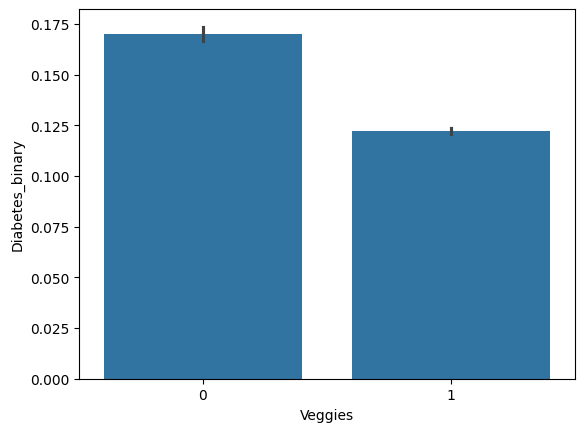

In [44]:
# Veggies BarPlot
veg = clean.loc[:,['Veggies','Diabetes_binary']]
sns.barplot(data=veg, x='Veggies', y='Diabetes_binary', orient='v')

In [45]:
# T-Test
stats.ttest_ind(clean.loc[clean['Veggies']==0,'Diabetes_binary'],clean.loc[clean['Veggies']==1,'Diabetes_binary'])

TtestResult(statistic=np.float64(27.416478424950622), pvalue=np.float64(3.115148003142853e-165), df=np.float64(243831.0))

In [46]:
# Mean
print('Veggies = 0 -->',clean[clean['Veggies']==0]['Diabetes_binary'].mean())
print('Veggies = 1 -->',clean[clean['Veggies']==1]['Diabetes_binary'].mean())

Veggies = 0 --> 0.17025819374435958
Veggies = 1 --> 0.12219634882712876


- 1 = Consume ≥ 1 vegetable(s) per day
- 0 = No vegetable consumption at all

The graph above shows that most people who consume veggies regularly tend to have 29% lower diabetes probability than those who don't. This also aligns with the fruit consumption behaviour.

---

<Axes: xlabel='Smoker', ylabel='Diabetes_binary'>

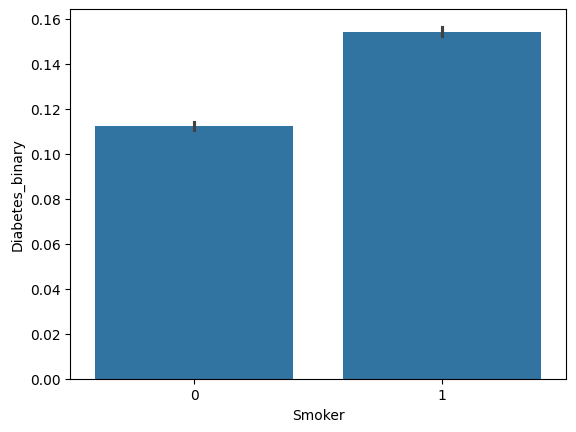

In [47]:
# Smoker BarPlot
smoker = clean.loc[:,['Smoker','Diabetes_binary']]
sns.barplot(data=smoker, x='Smoker', y='Diabetes_binary', orient='v')

In [48]:
# T-Test
stats.ttest_ind(clean.loc[clean['Smoker']==0,'Diabetes_binary'],clean.loc[clean['Smoker']==1,'Diabetes_binary'])

TtestResult(statistic=np.float64(-30.42379147107982), pvalue=np.float64(6.406016174485658e-203), df=np.float64(243831.0))

In [49]:
# Mean
print('Smoker = 0 -->',clean[clean['Smoker']==0]['Diabetes_binary'].mean())
print('Smoker = 1 -->',clean[clean['Smoker']==1]['Diabetes_binary'].mean())

Smoker = 0 --> 0.11262323346939979
Smoker = 1 --> 0.15440965638440549


- 0 = Not a smoker or Have smoked < 100 cigarettes (5 packs)  in your entire life 
- 1 = Have smoked ≥ 100 cigarettes (5 packs) in your entire life

According to this graph, active smokers are 37% more likely to suffer diabetes than those who don't

___

<Axes: xlabel='PhysActivity', ylabel='Diabetes_binary'>

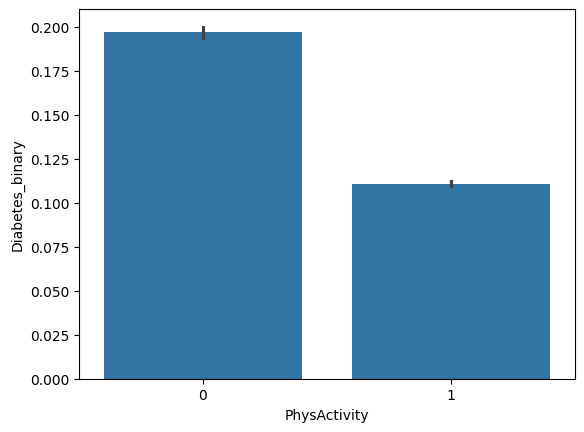

In [50]:
# PhysActivity BarPlot
PhysAct = clean.loc[:,['PhysActivity','Diabetes_binary']]
sns.barplot(data=PhysAct, x='PhysActivity', y='Diabetes_binary', orient='v')

In [51]:
# T-Test
stats.ttest_ind(clean.loc[clean['PhysActivity']==0,'Diabetes_binary'],clean.loc[clean['PhysActivity']==1,'Diabetes_binary'])

TtestResult(statistic=np.float64(53.83389307810093), pvalue=np.float64(0.0), df=np.float64(243831.0))

In [52]:
# Mean
print('PhysAct = 0 -->',clean[clean['PhysActivity']==0]['Diabetes_binary'].mean())
print('PhysAct = 1 -->',clean[clean['PhysActivity']==1]['Diabetes_binary'].mean())

PhysAct = 0 --> 0.19708372530573848
PhysAct = 1 --> 0.11085066324806497


Physical activity in past 30 days - not including job 
- 0 = no 
- 1 = yes

Based on this graph, Physical Activity plays an important role in lowering the probabilty of Diabetes by nearly 50%.

___

***Summary:***
- No fruit consumption significantly increases 22% chance of having diabetes 

- There's an anomaly pattern in heavy alcohol consumption where heavy drinkers have a lower diabetes probability rate due to imbalance respondent group. 

- Regular vegetable consumption can significantly lower 29% diabetes probability than those who don't.

- Active smokers are 37% more likely to suffer diabetes.

- Physical Activity plays an important role in lowering the probabilty of Diabetes by nearly 50%.

## **VI. CONCLUSION**

- All variables significantly influence the diabetes risk, however, most of the medical test variables (`HighCol`,`HeartDiseaseorAttack`,`HighBP`,`PhysActivity`,`Stroke`) play more crucial impact towards diabetes diagnosis & prediction.

- The general prevalence in the population is 13.12%
- Older population (55-79 years old) is at a higher risk of having diabetes with the prevalence rate ranging from `10.21% - 18.71%` of total diabetes patients.
- All demographic variables (`Income`,`Sex`,`Education`,`Age`) show strong positive correlations and influence the probability of having diabetes.
    - Male tend to have 17% higher risk of having diabetes than female 

    - Higher education & income level can reduce the risk of having diabetes by > 50%.

    - Starting from 35 years old and beyond, the diabetes risk is > 3x (and counting) than those who are in the early and mid 20s.

- Maintaining healthy lifestyle such as regular physical exercises, balance fruits & veggies consumption, and being a non-smoker can reduce significantly the probability of having diabetes up to 50%. 

In conclusion, maintaining healthy lifestyle through exercises and balance food consumption help reducing the risk of diabetes. Moreover, spreading awareness and knowledge regarding this issue through social media platform and influencers that will help building communities to be more aware and willing to do routine sports/exercises. Government needs to incentivize the lower education and income group to have a better access to the healthcare system. Besides, the help of government in regulating sugar level policy of daily food products consumed will be beneficial and reduce the prevalence rate faster.

In [ ]:
# Export data into CSV
clean.to_csv('clean_data.csv',index=False)